# zładowanie pliku oczyszczonego

In [29]:
import pandas as pd
import boto3
import os
from io import BytesIO
from dotenv import load_dotenv

# Wczytaj zmienne środowiskowe z .env
load_dotenv()

# Konfiguracja klienta S3
s3 = boto3.client(
    "s3",
    aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
    aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY"),
    endpoint_url=os.getenv("AWS_ENDPOINT_URL_S3")
)

# Dane pliku
BUCKET_NAME = "gotoitrafalmeteo"
OBJECT_KEY = "wyniki/final_wyniki_polmaratonu_.csv"

# Pobierz plik i wczytaj do DataFrame
response = s3.get_object(Bucket=BUCKET_NAME, Key=OBJECT_KEY)
df_raw = pd.read_csv(BytesIO(response['Body'].read()))

print("✅ Plik został wczytany poprawnie.")
df_raw


✅ Plik został wczytany poprawnie.


,Miejsce,Numer startowy,Imię,Nazwisko,Miasto,Kraj,Drużyna,Płeć,Płeć Miejsce,Kategoria wiekowa,...,15 km Czas,15 km Miejsce Open,15 km Tempo,20 km Czas,20 km Miejsce Open,20 km Tempo,Tempo Stabilność,Czas,Tempo,Rok
0,-1.689218,-1.561761,DAMIAN,DYDUCH,KĘPNO,POL,AZS POLITECHNIKA OPOLSKA,M,-1.427662,M30,...,00:48:49,-1.689317,-2.642636,01:06:54,-1.689126,-2.303654,-0.552896,4216.0,-2.726069,-1.122781
1,-1.688852,0.982118,KAMIL,MAŃKOWSKI,MIRKÓW,POL,PARKRUN WROCŁAW,M,-1.427136,M20,...,00:49:31,-1.688585,-2.583578,01:07:27,-1.688760,-2.329384,-0.606153,4227.0,-2.716548,-1.122781
2,-1.688486,-0.887917,ADAM,PUTYRA,WROCŁAW,POL,NaN,M,-1.426611,M40,...,00:49:31,-1.688951,-2.566208,01:07:28,-1.688394,-2.326525,-0.578805,4234.0,-2.710489,-1.122781
3,-1.688120,-1.286542,MICHAŁ,WÓJCIK,KROŚNICE,POL,WOSIEK TEAM KS AZS AWF WROCŁAW,M,-1.426085,M20,...,00:48:18,-1.689682,-2.594000,01:07:38,-1.688028,-2.089239,-0.046236,4278.0,-2.672403,-1.122781
4,-1.687754,0.780438,PATRYK,CHRZANOWSKI,BIELAWA,POL,PCH SPORT COMPLEX,M,-1.425560,M30,...,00:49:57,-1.688219,-2.562734,01:08:18,-1.687663,-2.257912,-0.570168,4302.0,-2.651630,-1.122781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18218,2.028582,0.262825,KATARZYNA,BRYLCZAK,OZIMEK,POL,NaN,K,0.135725,K40,...,02:03:07,2.045784,2.696899,02:45:53,2.031290,1.930326,-0.329793,10540.0,2.747812,0.890645
18219,2.028948,0.078820,MARIUSZ,GUBERNAT,BIELANY WROCŁAWSKIE,POL,NaN,M,2.346011,M40,...,01:58:31,2.018716,2.967871,02:44:56,2.024706,2.556418,2.032220,10547.0,2.753871,0.890645
18220,2.029313,1.542024,DOROTA,POKUSA,DORUCHÓW,POL,NaN,K,0.136250,K30,...,02:02:44,2.041760,2.953975,02:46:48,2.034948,2.153318,0.705117,10549.0,2.755602,0.890645
18221,2.029679,1.374746,IZABELA,GUBERNAT,BIELANY WROCŁAWSKIE,POL,NaN,K,0.136776,K40,...,01:58:33,2.019081,2.967871,02:44:59,2.025437,2.559277,2.016387,10549.0,2.755602,0.890645


# import modeli

In [30]:
from pycaret.regression import (
    setup, create_model, compare_models, finalize_model,
    predict_model, save_model, get_config, plot_model, tune_model
)
from sklearn.metrics import mean_absolute_error, root_mean_squared_error,r2_score


# trenowanie modelu na przetworzonych danych

In [34]:
s = setup(data=df_raw, target='Czas', session_id=123, train_size=0.8, verbose=False)


In [35]:
best_model = compare_models()
preds = predict_model(best_model)  # test set automatyczny z setup()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.6950
ridge,Ridge Regression,0.9462,7.6035,2.5671,1.0000,0.0003,0.0001,0.1330
dt,Decision Tree Regressor,0.7067,6.7253,2.4739,1.0000,0.0005,0.0001,0.2410
rf,Random Forest Regressor,0.4693,4.9439,2.0874,1.0000,0.0004,0.0001,6.2270
gbr,Gradient Boosting Regressor,8.5336,127.7570,11.3003,0.9999,0.0016,0.0012,3.6140
lightgbm,Light Gradient Boosting Machine,6.0418,207.7658,14.1874,0.9998,0.0026,0.0009,0.7330
llar,Lasso Least Angle Regression,9.9221,427.5458,20.6543,0.9997,0.0030,0.0014,0.1490
lasso,Lasso Regression,10.6719,503.6086,22.3885,0.9996,0.0033,0.0015,0.3080
ada,AdaBoost Regressor,62.3812,5986.5102,77.1937,0.9955,0.0107,0.0086,1.6290
et,Extra Trees Regressor,38.0326,19867.5376,139.8745,0.9852,0.0170,0.0048,3.9780


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


# wyniki podejrzane, usunięto kolumny ze zbyt duża korelacją

In [40]:
# Lista kolumn do usunięcia – pochodne Czasu, niedostępne użytkownikowi, identyfikatory
kolumny_do_usuniecia = [
    'Imię', 'Nazwisko', 'Miasto', 'Drużyna', 'Kraj',
    'Miejsce', 'Płeć Miejsce', 'Kategoria wiekowa Miejsce',
    '5 km Czas', '10 km Czas', '15 km Czas', '20 km Czas',
    '5 km Tempo', '10 km Tempo', '15 km Tempo', '20 km Tempo',
    '5 km Miejsce Open', '10 km Miejsce Open', '15 km Miejsce Open', '20 km Miejsce Open',
    'Tempo', 'Tempo Stabilność', 'Numer startowy'
    
]

# Usunięcie kolumn z df_raw
df_cleaned = df_raw.drop(columns=kolumny_do_usuniecia, errors='ignore')


In [41]:
s = setup(data=df_cleaned, target='Czas', session_id=123, train_size=0.8, verbose=False)


In [ ]:
best_model = compare_models()
preds = predict_model(best_model)  

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,857.3234,1167160.5733,1080.1706,0.1271,0.1473,0.1191,0.1750
ridge,Ridge Regression,859.1487,1173612.0635,1083.1303,0.1224,0.1477,0.1194,0.0350
br,Bayesian Ridge,859.2135,1173692.3876,1083.1667,0.1223,0.1477,0.1194,0.0380
lasso,Lasso Regression,859.5939,1174358.6569,1083.4719,0.1219,0.1478,0.1195,0.0390
llar,Lasso Least Angle Regression,859.5946,1174357.8640,1083.4716,0.1219,0.1478,0.1195,0.0370
lightgbm,Light Gradient Boosting Machine,861.8180,1177386.1094,1084.9062,0.1194,0.1479,0.1197,0.1700
huber,Huber Regressor,855.9729,1179221.5630,1085.6888,0.1182,0.1473,0.1178,0.1260
rf,Random Forest Regressor,864.2191,1183621.0013,1087.7704,0.1147,0.1482,0.1200,0.1970
dt,Decision Tree Regressor,864.0988,1183901.8130,1087.8993,0.1145,0.1482,0.1200,0.0390
et,Extra Trees Regressor,864.1470,1183900.0740,1087.8992,0.1145,0.1482,0.1200,0.1870


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,856.4088,1167208.7635,1080.3744,0.1134,0.1478,0.1196


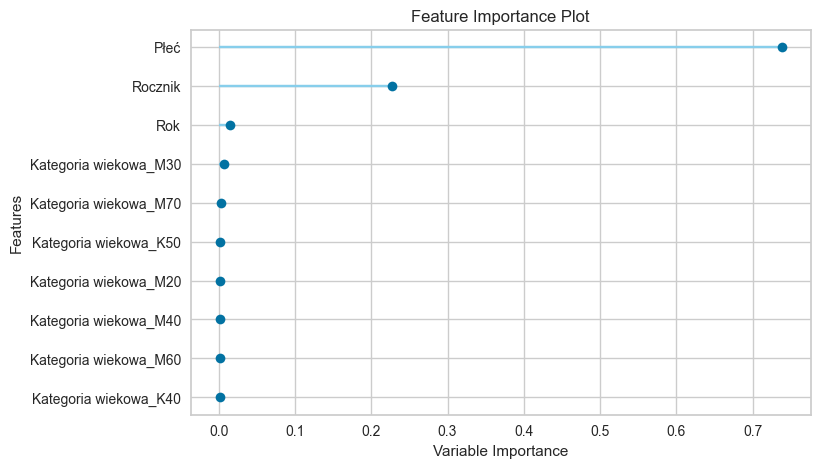

In [43]:
plot_model(best_model, plot='feature')

## Strojenie hiperparametrów, ale wyniki podobne

In [44]:
# Tworzymy bazowy model Gradient Boosting
gbr = create_model('gbr')

# Strojenie modelu (automatyczne)
gbr_tuned = tune_model(gbr, optimize='MAE')  


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,855.6306,1170871.7122,1082.0683,0.1501,0.1483,0.1193
1,856.9099,1178473.9526,1085.5754,0.1121,0.1463,0.1173
2,830.0703,1076155.9020,1037.3793,0.1444,0.1443,0.1184
3,853.0986,1138980.9505,1067.2305,0.0926,0.1456,0.1186
4,845.0620,1152396.3515,1073.4973,0.1071,0.1461,0.1172
5,896.9268,1256401.9295,1120.8934,0.1363,0.1528,0.1250
6,853.6551,1159546.9511,1076.8226,0.1292,0.1474,0.1189
7,853.0747,1167072.8688,1080.3115,0.1320,0.1459,0.1168
8,859.4268,1179025.2706,1085.8293,0.1408,0.1482,0.1198


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,860.6979,1181845.7457,1087.1273,0.1422,0.1489,0.1199
1,862.4037,1200024.3165,1095.4562,0.0958,0.1476,0.1179
2,834.4312,1090128.3526,1044.0921,0.1333,0.1450,0.1188
3,858.8237,1152821.4984,1073.6953,0.0816,0.1464,0.1193
4,857.0619,1180990.7354,1086.7340,0.0849,0.1478,0.1188
5,898.3107,1262960.2678,1123.8151,0.1318,0.1531,0.1252
6,857.7505,1174225.3094,1083.6168,0.1181,0.1481,0.1194
7,863.5405,1190678.6609,1091.1822,0.1144,0.1473,0.1181
8,867.0500,1197004.2406,1094.0769,0.1277,0.1490,0.1206


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [45]:
final_model = finalize_model(best_model)
save_model(final_model, 'model_polmaraton')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Rocznik', 'Rok'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Płeć', 'Kategoria wiekowa'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Płeć'],
                                     transformer=OrdinalEn...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': K      0
 M      1
 NaN   -1
 dtype: int64}]))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Kategoria wiekowa'],
                                     transformer=OneHotEncoder(cols=['Kategoria '
    